In [1]:
from datasets import load_dataset

column_names=["labels","text"]
train_dataset = load_dataset("csv", data_files="..\datasets\iitp-movie-reviews\hi\hi-train.csv", split="train", column_names=column_names, delimiter=',')

Using custom data configuration default-19fed32b792f61b1
Found cached dataset csv (C:/Users/arifa/.cache/huggingface/datasets/csv/default-19fed32b792f61b1/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [2]:
val_dataset = load_dataset("csv", data_files="..\datasets\iitp-movie-reviews\hi\hi-valid.csv", split="train", column_names=["labels","text"], delimiter=',')

Using custom data configuration default-5b44dba6bcc642d7
Found cached dataset csv (C:/Users/arifa/.cache/huggingface/datasets/csv/default-5b44dba6bcc642d7/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [3]:
test_dataset = load_dataset("csv", data_files="..\datasets\iitp-movie-reviews\hi\hi-test.csv", split="train", column_names=["labels","text"], delimiter=',')

Using custom data configuration default-07685abd38e45b7a
Found cached dataset csv (C:/Users/arifa/.cache/huggingface/datasets/csv/default-07685abd38e45b7a/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


In [4]:
from datasets import Dataset, DatasetDict

review_datasets = DatasetDict()
review_datasets['train'] = train_dataset
review_datasets['validation'] = val_dataset
review_datasets['test'] = test_dataset

In [5]:
review_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 2480
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 310
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 310
    })
})

In [6]:
train_dataset.set_format("pandas")

In [7]:
# get label counts for both classes
label_counts = train_dataset["labels"].value_counts()
num_labels = (len(label_counts.keys()))

In [8]:
label_counts

positive    1042
negative     741
neutral      697
Name: labels, dtype: int64

In [9]:
max_token_length = max(train_dataset['text'].str.len())
max_token_length

7211

In [10]:
train_dataset.reset_format()

In [11]:
from transformers import set_seed

set_seed(30)
# set_seed(42)

In [12]:
from transformers import PreTrainedTokenizerFast, AutoModelForSequenceClassification

tokenizer = PreTrainedTokenizerFast.from_pretrained("../Hindi Pretraining/models/unigram/bert-base-pretrained-hindi")

In [13]:
model =  AutoModelForSequenceClassification.from_pretrained("../Hindi Pretraining/models/unigram/bert-base-pretrained-hindi", num_labels=num_labels)

Some weights of the model checkpoint at ../Hindi Pretraining/models/unigram/bert-base-pretrained-hindi were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the mo

In [14]:
# num_added_tokens = tokenizer.add_tokens(["5","7","8","9"])

In [15]:
# Notice: resize_token_embeddings expect to receive the full size of the new vocabulary, i.e., the length of the tokenizer.
# model.resize_token_embeddings(len(tokenizer))

In [16]:
def tokenize_function(example):
    #return tokenizer(example["text"], truncation=True)
    return tokenizer(example["text"], truncation=True, max_length=128)

In [17]:
from transformers import DataCollatorWithPadding

tokenized_datasets = review_datasets.map(tokenize_function, batched=True, remove_columns=["text"])
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-19fed32b792f61b1\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-b50c9af17c3851ef.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-5b44dba6bcc642d7\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-a02bceada1d88116.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-07685abd38e45b7a\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-a7e13133a7d6e40b.arrow


In [18]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2480
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 310
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 310
    })
})

In [19]:
temp = tokenized_datasets.filter(lambda x:x if 0 in x["input_ids"] else None)

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-19fed32b792f61b1\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-186fe5f4f6105abf.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-5b44dba6bcc642d7\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-18615e1789dfb4ef.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-07685abd38e45b7a\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-674b8eddca9b5a2b.arrow


In [20]:
temp

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 861
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 105
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 87
    })
})

In [21]:
for sample in temp["train"]:
    print(tokenizer.decode(sample["input_ids"]))

[CLS] निर्माता :[UNK]शीतल विनोद तलवार, मधु‍ मैंटेना[UNK]निर्देशक :[UNK]रामगोपाल वर्मा[UNK]कलाकार :[UNK]विवेक ओबेरॉय, शत्रुघ्न सिन्हा, अभिमन्यु सिंह, सुशांत सिंह, जरीन वहाब, आशीष विद्यार्थी, राजा कृष्णमूर्ति, श्रीनिवास राव[UNK]* केवल वयस्कों के लिए * 16 रील * 2 घंटे 14 मिनट[UNK]रक्तचरित्र-1[UNK] शुरू होते ही स्पष्टीकरण ‍लिखा हुआ आता है कि सारे पात्र और कहानी काल्पिनक हैं। अगले ही ‍पल दिखाई देता है कि फिल्म एक सच्ची कहानी पर आधारित है। शायद कानूनी उलझनों[SEP]
[CLS] [UNK]उड़ान[UNK] से विक्रमादित्य[UNK]मोटवाने[UNK]ने अच्छे सिनेमा की उम्मीद जगाई थी और [UNK]लुटेरा[UNK] में उन्होंने उम्मीदों को पूरा किया। एक बेहतरीन प्रेम कहानी लंबे समय बाद परदे पर आई है। ओ हेनरी की कहानी [UNK]द लास्ट लीफ[UNK] को आधार बनाकर उसे गुजरे जमाने का टच दिया और अपने शानदार प्रस्तुति के बल पर विक्रम ने ‍[UNK]लुटेरे[UNK] को देखने लायक बनाया है।[UNK]पूरी फिल्म में निर्देशक का दबदबा है। उन्होंने दूसरी चीजों को हावी नहीं होने दिया और अपनी पकड़ बनाए रखी है। कई बार कहानी हिचकोले खाती है, लेकिन विक्रमादित्य ने इन[SEP]
[CLS] 

[CLS] इम्तियाज अली की फिल्मों के हीरो-हीरोइन अक्सर कन्फ्यूज रहते हैं कि उनके बीच प्यार है या नहीं। बिछुड़ने पर उन्हें अहसास होता है कि वे एक-दूसरे को चाहते हैं और जब सामने होते हैं तो लड़ने लगते हैं। इम्तियाज के भाई आरिफ अली ने अपने भाई की इसी बात को [UNK]लेकर हम दीवाना दिल[UNK] में पेश किया है। इम्तियाज की सोचा ना था, जब वी मेट, हाईवे जैसी फिल्में आपको [UNK]लेकर हम दीवाना दिल[UNK] देखते वक्त याद आएंगी। इतनी सारी फिल्मों को सामने रख कर भी आरिफ ढंग की फिल्म नहीं बना पाए।[UNK]फिल्म को[SEP]
[CLS] इस फिल्म के डायरेक्टर और लीड हीरो राजकुमार राव दोनों में एक समानता जरूर है कि दोनों ही करियर में चैलेंज लेना अच्छी तरह से जानते हैं। अगर हंसल की पिछली फिल्म की बात करें तो कंगना लीड जैसी टॉप ऐक्ट्रेस के साथ जब हंसल ने [UNK]सिमरन[UNK] बनाई तो यहां भी उन्होंने बॉक्स ऑफिस की डिमांड को साइड करके सिर्फ स्क्रिप्ट और किरदारों पर ही फोकस किया, बेशक [UNK]सिमरन[UNK] टिकट खिड़क पर कहीं टिकट नहीं पाई, लेकिन क्रिटिक्स और दर्शकों की एक अलग क्लास ने सिमरन के लिए कंगना की जी भरकर तारीफें कीं। वैसे इससे पहले हंसल

In [22]:
def assign_label(example):
    mapping = {"neutral":0, "positive":1, "negative":2}
    example['labels'] = mapping[example['labels']]
    return example

In [23]:
tokenized_datasets = tokenized_datasets.map(assign_label)
tokenized_datasets.set_format("torch")
tokenized_datasets.column_names

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-19fed32b792f61b1\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-d1f59db6cf9c6766.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-5b44dba6bcc642d7\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-ec5e33d8c4d877cc.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\csv\default-07685abd38e45b7a\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-976f7e204ee472ff.arrow


{'train': ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
 'validation': ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
 'test': ['labels', 'input_ids', 'token_type_ids', 'attention_mask']}

In [24]:
samples = [tokenized_datasets["train"][i] for i in range(5)]
samples

for chunk in data_collator(samples)["input_ids"]:
    print(f"\n'>>> {tokenizer.decode(chunk)}'")

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



'>>> [CLS] निर्माता :[UNK]शीतल विनोद तलवार, मधु‍ मैंटेना[UNK]निर्देशक :[UNK]रामगोपाल वर्मा[UNK]कलाकार :[UNK]विवेक ओबेरॉय, शत्रुघ्न सिन्हा, अभिमन्यु सिंह, सुशांत सिंह, जरीन वहाब, आशीष विद्यार्थी, राजा कृष्णमूर्ति, श्रीनिवास राव[UNK]* केवल वयस्कों के लिए * 16 रील * 2 घंटे 14 मिनट[UNK]रक्तचरित्र-1[UNK] शुरू होते ही स्पष्टीकरण ‍लिखा हुआ आता है कि सारे पात्र और कहानी काल्पिनक हैं। अगले ही ‍पल दिखाई देता है कि फिल्म एक सच्ची कहानी पर आधारित है। शायद कानूनी उलझनों[SEP]'

'>>> [CLS] [UNK]उड़ान[UNK] से विक्रमादित्य[UNK]मोटवाने[UNK]ने अच्छे सिनेमा की उम्मीद जगाई थी और [UNK]लुटेरा[UNK] में उन्होंने उम्मीदों को पूरा किया। एक बेहतरीन प्रेम कहानी लंबे समय बाद परदे पर आई है। ओ हेनरी की कहानी [UNK]द लास्ट लीफ[UNK] को आधार बनाकर उसे गुजरे जमाने का टच दिया और अपने शानदार प्रस्तुति के बल पर विक्रम ने ‍[UNK]लुटेरे[UNK] को देखने लायक बनाया है।[UNK]पूरी फिल्म में निर्देशक का दबदबा है। उन्होंने दूसरी चीजों को हावी नहीं होने दिया और अपनी पकड़ बनाए रखी है। कई बार कहानी हिचकोले खाती है, लेकिन विक्रमादित्य ने इ

In [25]:
review_datasets["train"][:5]

{'labels': ['neutral', 'positive', 'neutral', 'neutral', 'positive'],
 'text': ['निर्माता :\nशीतल विनोद तलवार, मधु\u200d मैंटेना\n\nनिर्देशक :\nरामगोपाल वर्मा\n\nकलाकार :\nविवेक ओबेरॉय, शत्रुघ्न सिन्हा, अभिमन्यु सिंह, सुशांत सिंह, जरीन वहाब, आशीष विद्यार्थी, राजा कृष्णमूर्ति, श्रीनिवास राव\n\n* केवल वयस्कों के लिए * 16 रील * 2 घंटे 14 मिनट\n\n\n’रक्तचरित्र-1’ शुरू होते ही स्पष्टीकरण \u200dलिखा हुआ आता है कि सारे पात्र और कहानी काल्पिनक हैं। अगले ही \u200dपल दिखाई देता है कि फिल्म एक सच्ची कहानी पर आधारित है। शायद कानूनी उलझनों से बचने के लिए रामगोपाल वर्मा को विरोधाभास बातें साथ करनी पड़ी हो।\n\n‘रक्तचरित्र’ की कहानी आंध्रप्रदेश के रवि परिताला और उसके विरोधी सूरी पर आधारित है। रामू ने उससे प्रेरणा लेकर, कुछ अपनी कल्पना मिलाकर ‘रक्तचरित्र’ को दो भागों में बनाया है।\n\nपहले भाग में दिखाया गया है कि किस तरह अपने पिता और भाई की हत्या होने के बाद रवि (फिल्म में प्रताप) अपना बदला लेता है। इन हत्याओं में नरसिम्हा देवा रेड्डी (राजा कृष्णमूर्ति), नागमणि रेड्डी (श्रीनिवास राव) और मंदा (आशीष विद्

In [26]:
from torch.utils.data import DataLoader
# batch_size = 16
batch_size = 32

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=batch_size, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=batch_size, collate_fn=data_collator
)

In [27]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([32]),
 'input_ids': torch.Size([32, 128]),
 'token_type_ids': torch.Size([32, 128]),
 'attention_mask': torch.Size([32, 128])}

In [28]:
import torch
with torch.no_grad():
    outputs = model(**batch)
    print(outputs.loss, outputs.logits.shape)

tensor(1.1493) torch.Size([32, 3])


In [29]:
import numpy as np
import evaluate

metric_fun = evaluate.load("accuracy")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    metric_result = metric_fun.compute(references=labels, predictions=predictions)
    return {
        "accuracy": metric_result["accuracy"],
    }

In [30]:
#  disable weights and biases logging
import os
os.environ["WANDB_DISABLED"] = "true"

In [31]:
from transformers import TrainingArguments

# batch_size = 16
batch_size = 32
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size


training_args = TrainingArguments(
    report_to = None,
    output_dir="models/bert-unigram-hindi-classifier",
    overwrite_output_dir=True,
    save_strategy="epoch",
    evaluation_strategy="epoch",
    #learning_rate=2e-5,
    learning_rate=3e-5,
    #weight_decay=0.01,
    weight_decay=0.02,
    #warmup_ratio = 0.1,
    warmup_ratio = 0.05,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    #num_train_epochs=5,
    num_train_epochs=5,
    #push_to_hub=True,
    fp16=True,
    logging_steps=logging_steps,
    metric_for_best_model = 'accuracy',
    load_best_model_at_end=True,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [32]:
# from transformers import TrainingArguments

# # batch_size = 16
# batch_size = 32
# # Show the training loss with every epoch
# logging_steps = len(tokenized_datasets["train"]) // batch_size


# training_args = TrainingArguments(
#     report_to = None,
#     output_dir="models/bert-unigram-hindi-classifier",
#     overwrite_output_dir=True,
#     save_strategy="epoch",
#     evaluation_strategy="epoch",
#     learning_rate=1e-5,
#     #learning_rate=3e-5,
#     weight_decay=0.01,
#     #weight_decay=0.02,
#     #warmup_ratio = 0.1,
#     warmup_ratio = 0.05,
#     per_device_train_batch_size=batch_size,
#     per_device_eval_batch_size=batch_size,
#     #num_train_epochs=5,
#     num_train_epochs=5,
#     #push_to_hub=True,
#     fp16=True,
#     logging_steps=logging_steps,
#     metric_for_best_model = 'accuracy',
#     load_best_model_at_end=True,
# )

In [33]:
# from datasets import concatenate_datasets

# entire_train = concatenate_datasets([tokenized_datasets["train"], tokenized_datasets["validation"]]) 

In [34]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    #train_dataset=entire_train,
    eval_dataset=tokenized_datasets["validation"],
    #eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [35]:
trainer.evaluate()

{'eval_loss': 1.1629457473754883,
 'eval_accuracy': 0.25483870967741934,
 'eval_runtime': 3.6312,
 'eval_samples_per_second': 85.37,
 'eval_steps_per_second': 2.754}

In [36]:
trainer.train()

C:\Users\arifa\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.956400,0.847478,0.596774
2,0.652900,0.855520,0.587097
3,0.438200,1.011295,0.619355
4,0.264400,1.143932,0.606452
5,0.166800,1.205575,0.619355


TrainOutput(global_step=390, training_loss=0.49117240416697966, metrics={'train_runtime': 101.9503, 'train_samples_per_second': 121.628, 'train_steps_per_second': 3.825, 'total_flos': 815651594956800.0, 'train_loss': 0.49117240416697966, 'epoch': 5.0})

In [37]:
trainer.evaluate(tokenized_datasets["test"])

{'eval_loss': 0.934954822063446,
 'eval_accuracy': 0.667741935483871,
 'eval_runtime': 1.0458,
 'eval_samples_per_second': 296.433,
 'eval_steps_per_second': 9.562,
 'epoch': 5.0}

In [38]:
y_preds, y_true, _ = trainer.predict(tokenized_datasets["test"])

In [39]:
y_preds = np.argmax(y_preds, axis=-1)

In [40]:
from sklearn.metrics import classification_report
target_names = ["neutral", "positive", "negative"]
print(classification_report(y_true, y_preds,target_names=target_names))

              precision    recall  f1-score   support

     neutral       0.60      0.63      0.62        90
    positive       0.70      0.75      0.72       122
    negative       0.69      0.60      0.64        98

    accuracy                           0.67       310
   macro avg       0.66      0.66      0.66       310
weighted avg       0.67      0.67      0.67       310



Text(0.5, 1.0, 'Confusion matrix for QC')

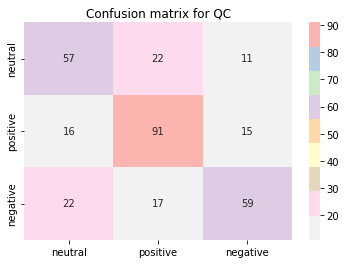

In [42]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

#plot heatmap of confusion matrix
mat = confusion_matrix(y_true, y_preds)
heatmap(mat, cmap="Pastel1_r", fmt="d", xticklabels=target_names, yticklabels=target_names, annot=True)

#add overall title to plot
plt.title('Confusion matrix for QC', fontsize = 12) # title with fontsize 20

In [57]:
misclassified = [i for i in range(len(y_preds)) if ((y_preds[i] != y_true[i]) and (y_true[i]==0) and (y_preds[i]==1))]

In [58]:
misclassified = test_dataset.select(misclassified)

In [59]:
misclassified

Dataset({
    features: ['labels', 'text'],
    num_rows: 22
})

In [63]:
misclassified[:]

{'labels': ['neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral'],
 'text': ['टैप डांस में आमिर खान का कौशल नजर आता है।',
  '1- बेकार/ 2- औसत/ 3- अच्छी/ 4- शानदार/ 5- अद्\u200dभुत\nनिर्देशक :\nअतुल अग्निहोत्री\n\nसंगीत :\nसाजिद-वाजिद\n\nकलाकार :\nसोहेल खान, ईशा कोप्पिकर, शरमन जोशी, गुल पनाग, अमृता अरोरा, शरत सक्सेना, दिलीप ताहिल, सलमान खान (विशेष भूमिका), कैटरीना कैफ (विशेष भूमिका), अरबाज खान (विशेष भूमिका)\n\n\n\n‘हैलो’ को देखते समय अनुराग बसु की ‘लाइफ इन मेट्रो’ की याद आना स्वाभाविक है। ‘मेट्रो’ के किरदार की तरह ‘हैलो’ के किरदार भी अपने काम के दबाव से परेशान हैं। ‘मेट्रो’ में बड़े शहरों में रहने वालों की लाइफ स्टाइल दिखाई गई थी, यहाँ पृष्ठभूमि में कॉल सेंटर आ गया।\n\nचेतन भगत के उपन्यास ‘वन नाइट @ कॉल सेंटर’ पर आधारित इस फिल्म में एक रात की कहानी है, जो प्रि

In [60]:
trainer.save_model()

In [61]:
model = AutoModelForSequenceClassification.from_pretrained("models/bert-unigram-hindi-classifier")
model.to("cuda")

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
trainer.evaluate(tokenized_datasets["validation"])